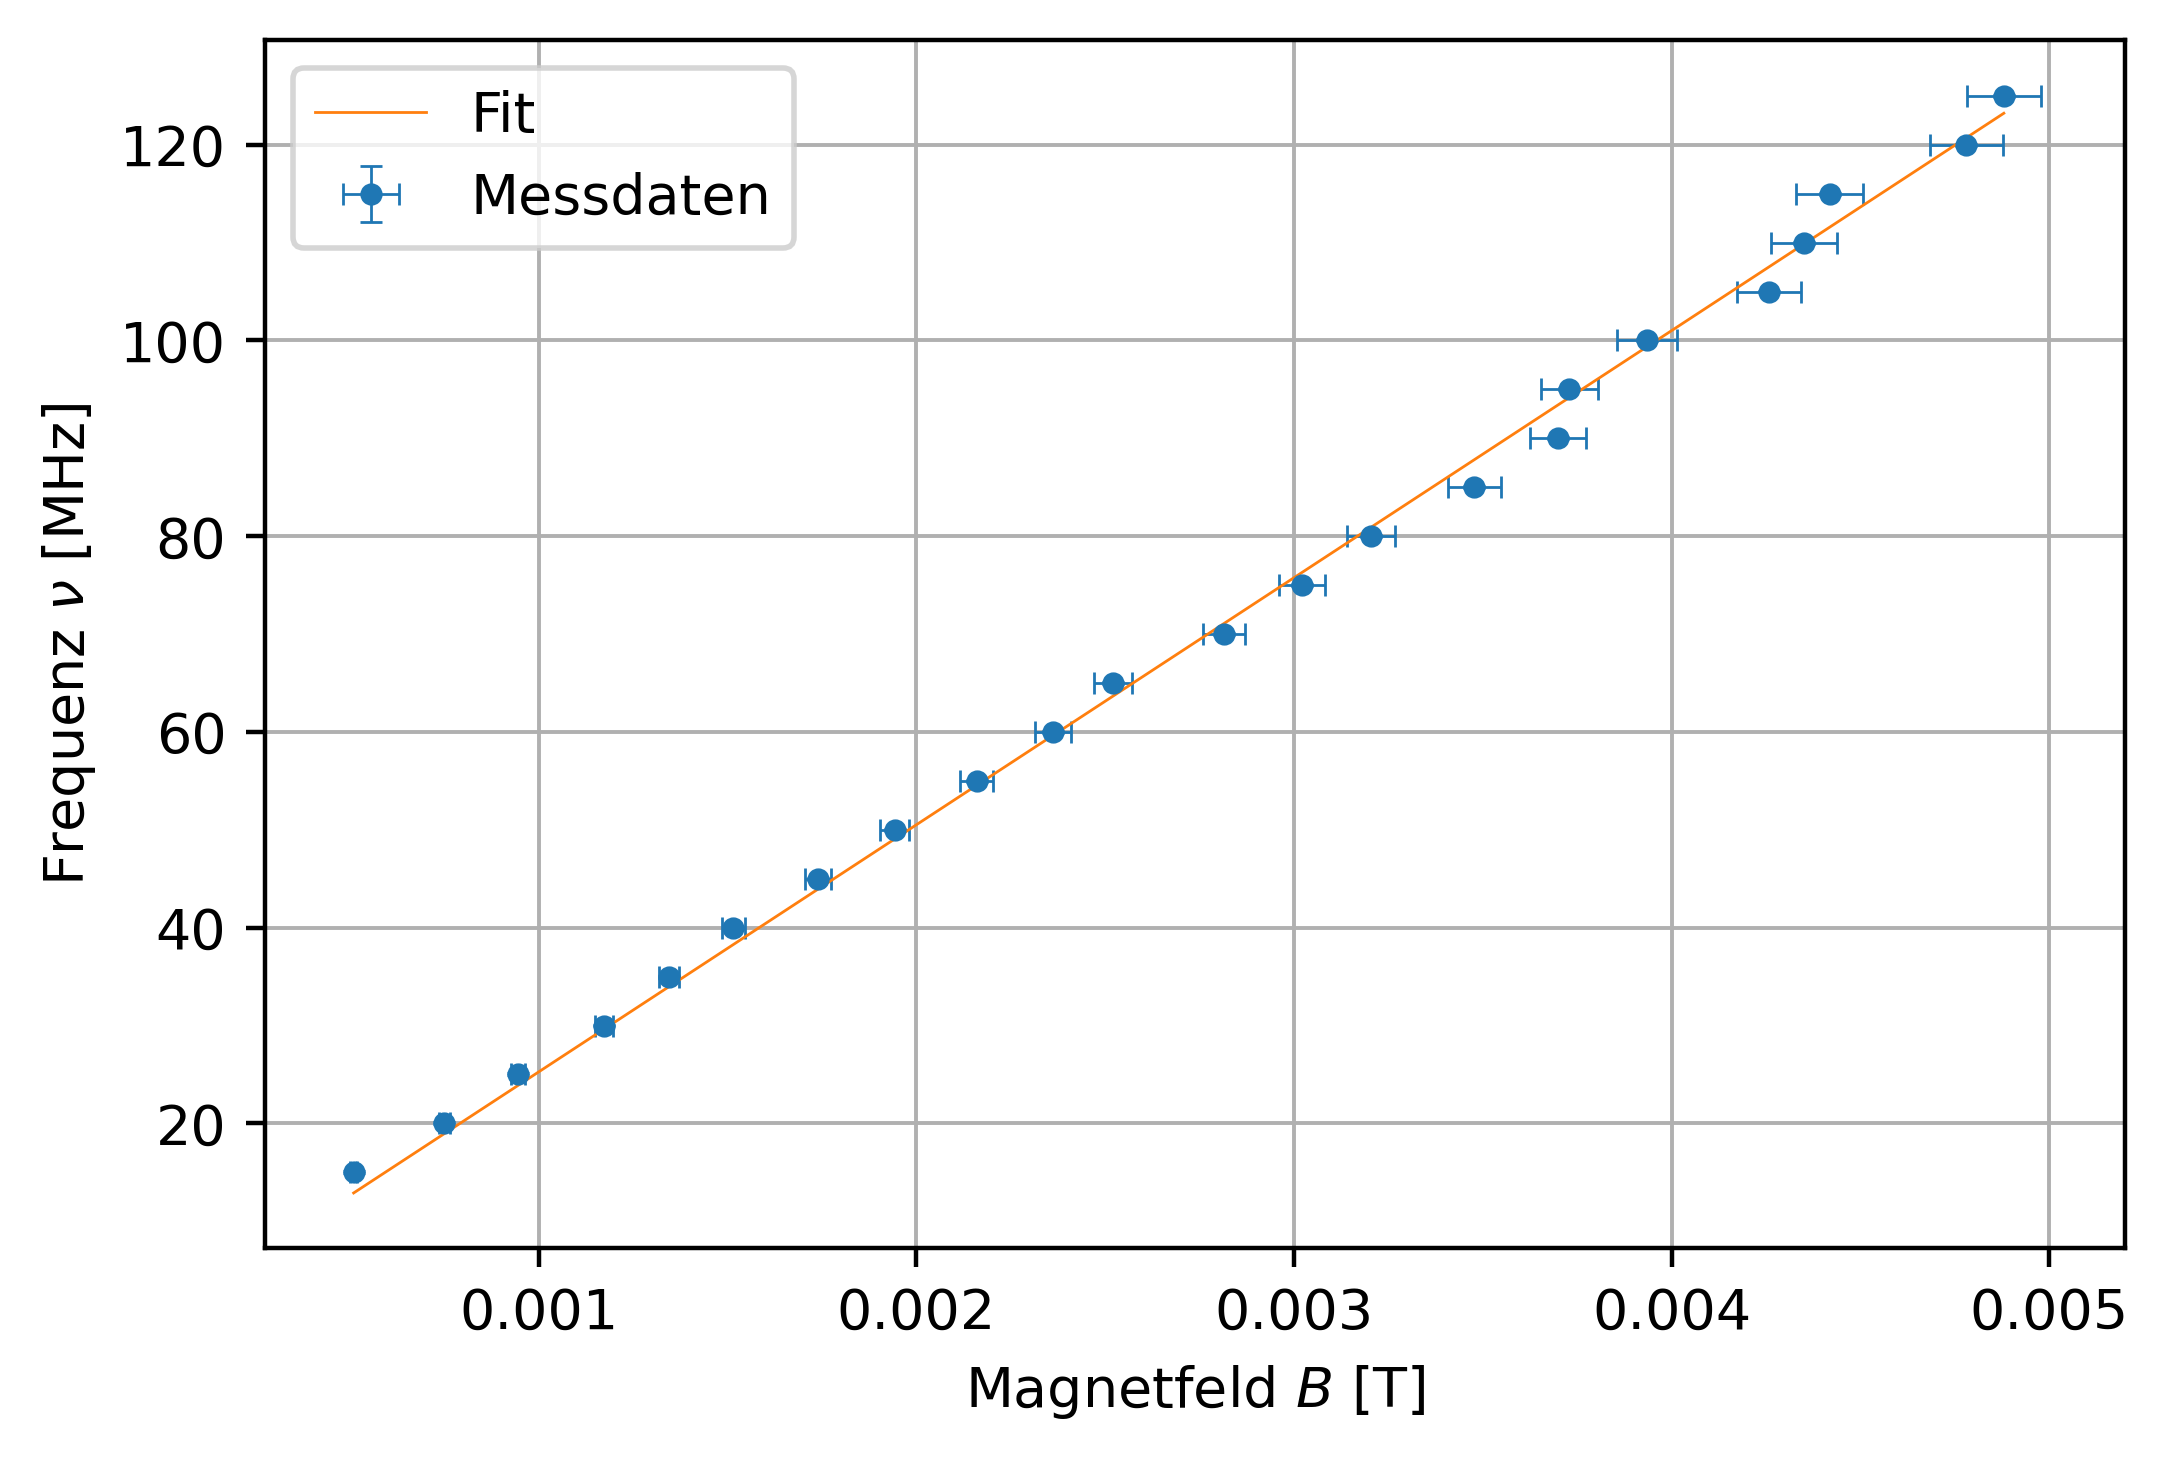

Steigung:  [25250.13936246] ± [113.39099532]
lande faktor: [1.80404813]
fehler lande faktor: [0.00810145]


In [47]:
#Hier werden die notwendigen Pakete eingebunden
import numpy as np #Numpy enthält viele mathematische Funktionen
import matplotlib.pyplot as plt #enthält die Grundlagen der Darstelllung
import scipy.optimize as opt #liefert Funktionen, mit denen die Funktionsparameter berechnet werden

N = 320
mu0 = 1.257e-6
R = 0.068
h = 6.626e-34
mub = 9.274e-24

def B(I):
    return  0.9*8*mu0 * I * N / (np.sqrt(125)*R)

data = np.loadtxt('v30_values.txt') #Die Daten sind in 'Werte.txt' gespeichert und werden daraus geladen
y = data[:,0] #Die Werte der ersten Spalte sind die x-Werte
x = B(data[:,1]) #in der zweiten Spalte sind die y-Werte
sigma1 = 0.02*x #In dritten Spalte stehen die y-Fehler
sigma = data[:,3]


def f(x, a): #Hier wird die Funktion beschrieben deren Verlauf genähert werden soll. Dabei ist wichtig, dass x an erster Stelle steht
	return a*x

p0 = [0] #In dieser Zeile werden geschätzte Werte für a und b angegeben

fit, err = opt.curve_fit(f, x, y, p0, sigma) #Durch diese Zeile werden die Parameter des Fits berechnet. Bei der chi²-Methode wird nur der y-Fehler beachtet.
# dokumentation von curve_fit: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
perr = np.sqrt(np.diag(err)) #hier wird der zu den Parametern gehörige Fehler bestimmt

plt.figure(dpi = 400) #erstellen einer neuen Abbildung


plt.errorbar(x, y,xerr = sigma1, yerr=sigma, marker='.', ls='', capsize=2, capthick=0.5, lw=0.5, label="Messdaten") #Die Messwerte werden mit Fehler dargestellt. 
plt.plot(x, [f(x, *fit) for x in x], label="Fit",lw = 0.5) #Hiermit wird die Funktion dargestellt) 

#--------------Stil-----------------------
plt.ylabel(r"Frequenz $\nu$ [MHz]") #x-Beschriftung
plt.xlabel("Magnetfeld $B$ [T]") #y-Beschriftung
plt.grid(lw=0.7) #Darstellung eines Rasters im Hintergrund
plt.legend() #Anzeige der Legende 
plt.savefig('B_plot.pdf') #Hiermit wird der Plot in der Datei 'Plot.pdf' gespeichert
plt.show() #Vorschau des Plots

#Ausgabe der Fitparameter
print('Steigung: ', fit, '±', perr)

print("lande faktor:",h/mub * fit*1e6)
print("fehler lande faktor:", h/mub*perr*1e6)
#Diese Vorlage kann nach belieben erweitert werden. Da es sich bei Python um eine vollständige Programmiersprache handelt,
#gibt es nahezu unbegrenzte Möglichkeiten dieses Programm zu erweitern.
